In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Download the data from the above link. How many ".csv" files are available in the dataset?

In [2]:
links = pd.read_csv(r"C:\Users\Yalavarthi Saadhika\Downloads\movie_data (1)\links.csv")

In [3]:
movies = pd.read_csv(r"C:\Users\Yalavarthi Saadhika\Downloads\movie_data (1)\movies.csv")

In [17]:
ratings = pd.read_csv(r"C:\Users\Yalavarthi Saadhika\Downloads\movie_data (1)\ratings.csv")

In [5]:
tags = pd.read_csv(r"C:\Users\Yalavarthi Saadhika\Downloads\movie_data (1)\tags.csv")

# What is the shape of "movies.csv"?


In [6]:
movies.shape

(9742, 3)

# What is the shape of "ratings.csv"?


In [7]:
ratings.shape

(100836, 4)

In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


# How many unique "userId" are available in "ratings.csv"?


In [19]:
unique_user_count = ratings['userId'].nunique()

In [21]:
unique_user_count

610

# Which movie has recieved maximum number of user ratings?


In [26]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [28]:
ratings.columns = ratings.columns.str.strip()

In [30]:
rating_counts = ratings.groupby('movieId').size()

In [31]:
rating_counts.idxmax()

356

In [32]:
max_rated_movie_id = rating_counts.idxmax()

In [33]:
rating_counts.max()

329

In [34]:
max_ratings_count = rating_counts.max()

In [35]:
max_rated_movie_id

356

In [36]:
max_ratings_count 

329

In [37]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [40]:
rating_counts = rating_counts.reset_index(name='rating_count')

In [42]:
rating_counts = rating_counts.merge(movies, on='movieId')

In [43]:
rating_counts.loc[rating_counts['rating_count'].idxmax()]

movieId                              356
rating_count                         329
title                Forrest Gump (1994)
genres          Comedy|Drama|Romance|War
Name: 314, dtype: object

In [44]:
max_rated_movie = rating_counts.loc[rating_counts['rating_count'].idxmax()]

In [45]:
max_rated_movie

movieId                              356
rating_count                         329
title                Forrest Gump (1994)
genres          Comedy|Drama|Romance|War
Name: 314, dtype: object

# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [46]:
movies[movies['title'] == 'Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [47]:
matrix_movie = movies[movies['title'] == 'Matrix, The (1999)']

In [52]:
if not matrix_movie.empty:
    matrix_movie_id = matrix_movie['movieId'].values[0]

    # Find the tags for this movie
    matrix_tags = tags[tags['movieId'] == matrix_movie_id]

    # Print out the tags
    print("Tags for 'Matrix, The (1999)':")
    print(matrix_tags['tag'].tolist())
else:
    print("Movie 'Matrix, The (1999)' not found in the dataset.")

Tags for 'Matrix, The (1999)':
['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [60]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [61]:
movies[movies['title']=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [62]:
movies[movies['title']=="Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

589

In [63]:
teriminator_movieID = movies[movies['title']=="Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

In [64]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [65]:
ratings[ratings['movieId']==teriminator_movieID]

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [66]:
ratings[ratings['movieId']==teriminator_movieID]['rating'].mean()

3.970982142857143

In [67]:
round(ratings[ratings['movieId']==teriminator_movieID]['rating'].mean(), 2)

3.97

# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [68]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [69]:
movies[movies['title']=="Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [70]:
fight_club_movieID = movies[movies['title']=="Fight Club (1999)"]['movieId'].values[0]

In [71]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [72]:
ratings[ratings['movieId']==fight_club_movieID]

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


In [73]:
fight_club = ratings[ratings['movieId']==fight_club_movieID]
fight_club

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


In [74]:
fight_club_ratings = fight_club['rating']

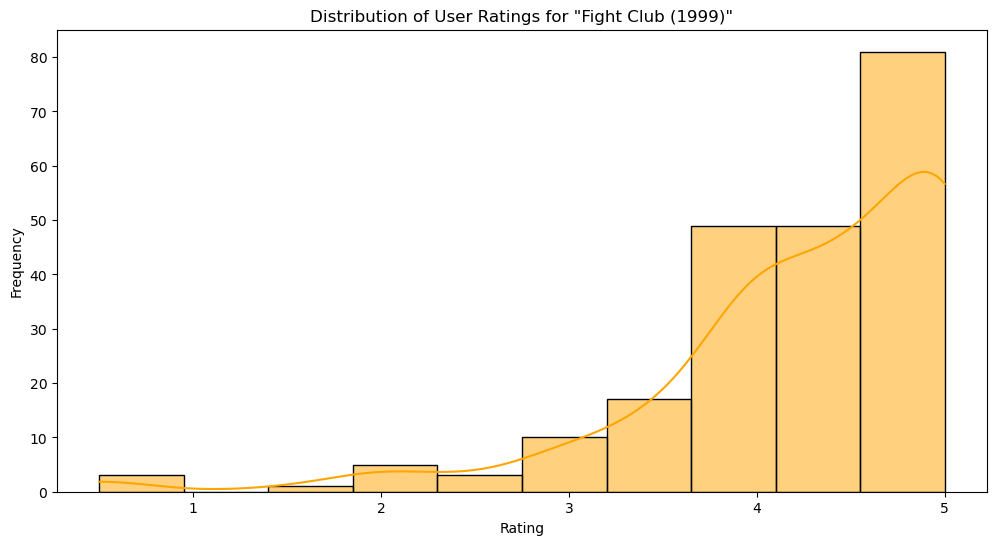

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(fight_club_ratings, kde=True, bins=10, color='orange')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:

Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
Filter only those movies which have more than 50 user ratings (i.e. > 50).
Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

# Which movie is the most popular based on average user ratings?

Answer this question only after applying the above mentioned "Mandatory Operration".

In [78]:
grouped_ratings = ratings.groupby('movieId').agg(rating_count=('rating','count'),average_rating=('rating','mean')).reset_index()

In [79]:
grouped_ratings

,movieId,rating_count,average_rating
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [80]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [82]:
merged_df = pd.merge(movies,grouped_ratings, on = 'movieId')

In [83]:
merged_df

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [84]:
popular_movies = merged_df[merged_df['rating_count'] > 50]
popular_movies

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [86]:
most_popular_movie = popular_movies.loc[popular_movies['average_rating'].idxmax()]

In [87]:
most_popular_movie

movieId                                        318
title             Shawshank Redemption, The (1994)
genres                                 Crime|Drama
rating_count                                   317
average_rating                            4.429022
Name: 277, dtype: object

# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [89]:
top_5_popular_movies =  popular_movies.sort_values(by='rating_count', ascending=False).head(5)

In [90]:
print(top_5_popular_movies[['title', 'rating_count']])

                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [91]:
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]

In [92]:
sci_fi_movies.sort_values(by='rating_count', ascending=False)

,movieId,title,genres,rating_count,average_rating
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [93]:
sci_fi_movies.sort_values(by='rating_count', ascending=False).iloc[2]

movieId                                        480
title                         Jurassic Park (1993)
genres            Action|Adventure|Sci-Fi|Thriller
rating_count                                   238
average_rating                                3.75
Name: 418, dtype: object

# Mention the movieId of the movie which has the highest IMDB rating.

In [94]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [96]:
grouped_ratings = ratings.groupby('movieId').agg(rating_count=('rating', 'count'),
                                                 average_rating=('rating', 'mean')).reset_index()

In [97]:
grouped_ratings

,movieId,rating_count,average_rating
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [98]:
merged_df = pd.merge(movies, grouped_ratings, on='movieId')
merged_df.head()

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [99]:
popular_movies = merged_df[merged_df['rating_count'] > 50]
popular_movies.head()

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [100]:
movies_with_links = pd.merge(popular_movies, links, on='movieId')
movies_with_links.head()

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [101]:
import requests
from bs4 import BeautifulSoup

In [102]:

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'}
    
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
    return imdb_rating.text if imdb_rating else np.nan

In [ ]:
movies_with_links['imdb_rating'] = movies_with_links['imdbId'].apply(lambda x: scrapper(x))
movies_with_links.head()

In [ ]:
highest_rated_movie = movies_with_links.loc[movies_with_links['imdb_rating'].astype(float).idxmax()]
highest_rated_movie

In [ ]:
print(f"The movie with the highest IMDb rating is: '{highest_rated_movie['title']}' with movieId: {highest_rated_movie['movieId']} 
        and an IMDb rating of {highest_rated_movie['imdb_rating']}")